<a href="https://colab.research.google.com/github/Bagunu/Heartfailure/blob/veycell/HeartFailure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
heart_failure=pd.read_csv("datasets_33180_43520_heart.csv")
heart_failure.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Dataset columns:**

age: The person’s age in years

sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type

— Value 0: asymptomatic

— Value 1: atypical angina

— Value 2: non-anginal pain

— Value 3: typical angina

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results
— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: 

downsloping; 1: flat; 2: upsloping

0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

target: Heart disease (1 = no, 0= yes)

In [3]:
# five-number summary
heart_failure.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**NULL**

Checking for null values

In [4]:
heart_failure.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print(heart_failure['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


It occurs that there are 138 people with heart disease, which makes our data set balanced (55% to 45%)

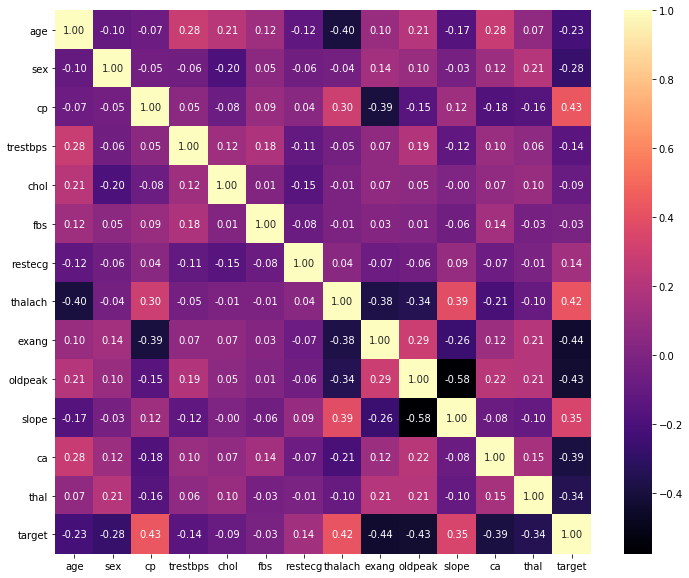

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_failure.corr(),annot=True,cmap="magma",fmt='.2f')

From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. There is no multicollinearity in out dataset.

In [8]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [9]:
df2 = heart_failure.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(target):
    if target == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

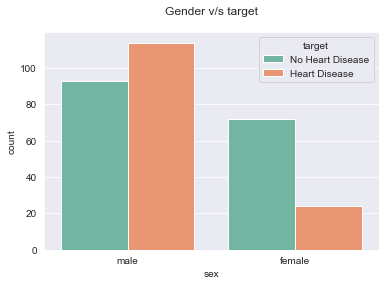

In [10]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

According to this dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women.

**Build a predictive model to help ultimate determine whether or not a patient will be heart desease or not? Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?**

**Split Train and Test data**

In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= heart_failure.target #target variable is heart_disease
X= heart_failure.drop('target',axis=1)

#We are splitting our dataset 75 to 25.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify= y)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape) 

(227, 13) (227,)
(76, 13) (76,)


After we splitting the data, we need to scale it. If we don't scale our values, the model we biased towards the large numbers.

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Building Machine Learning Models

## Random Forest

Next, we are building models with different types machine-learning algorithms and compare which model yields the best result.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# default parameters
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
rf_fit= rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
#Avoid Overfitting
y_train_predicted = rf_classifier.predict(X_train)

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        28
           1       0.88      0.75      0.81        48

    accuracy                           0.78        76
   macro avg       0.77      0.79      0.77        76
weighted avg       0.80      0.78      0.78        76



In [16]:
acc_rf = accuracy_score(y_test,y_pred)
acc_rf

NameError: name 'accuracy_score' is not defined

Text(92.68, 0.5, 'Predicted class')

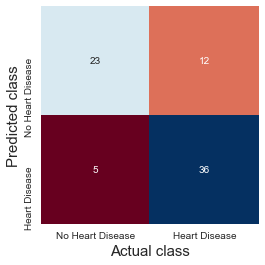

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# making the confusion matrix which will provide binary classifier.
cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['No Heart Disease', 'Heart Disease'],
yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Actual class', fontsize= 15)
plt.ylabel('Predicted class',fontsize= 15)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.78
Precision score: 0.75
Recall score: 0.88
F1 score: 0.78


## Naive Bayes

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix 
  
classifier_BNB = BernoulliNB(); 
classifier_BNB.fit(X_train, y_train) 
cv_ber= classifier_BNB.fit(X_train, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_BNB.predict(X_test) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[23, 12],
       [ 5, 36]], dtype=int64)

Text(92.68, 0.5, 'Predicted Class')

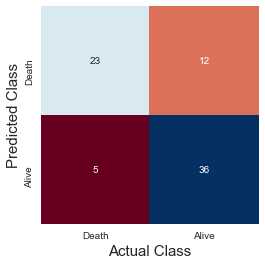

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['Death', 'Alive'],
yticklabels=['Death', 'Alive'])
plt.xlabel('Actual Class', fontsize= 15)
plt.ylabel('Predicted Class',fontsize= 15)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.78
Precision score: 0.75
Recall score: 0.88
F1 score: 0.78


In [22]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.72


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

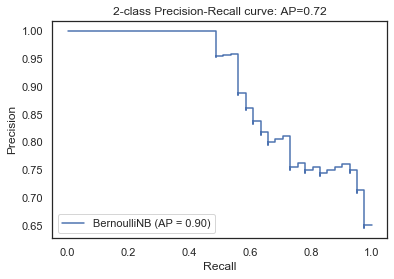

In [23]:
sns.set(style="white", color_codes=True)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier_BNB, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
cv_logreg= logreg.fit(X_train, y_train)

# predicting test set results 
y_pred = logreg.predict(X_test) 

Text(89.18, 0.5, 'Predicted Class')

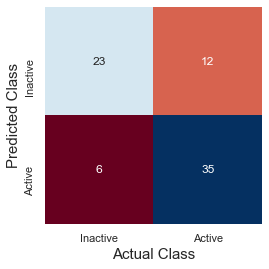

In [25]:
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['Inactive', 'Active'],
yticklabels=['Inactive', 'Active'])
plt.xlabel('Actual Class', fontsize= 15)
plt.ylabel('Predicted Class',fontsize= 15)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.76
Precision score: 0.74
Recall score: 0.85
F1 score: 0.76


**KNN**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn import neighbors

In [28]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [29]:
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.8986784140969163, 0.6710526315789473]
3 : [0.8986784140969163, 0.7368421052631579]
4 : [0.8766519823788547, 0.75]
5 : [0.8942731277533039, 0.7631578947368421]
6 : [0.8810572687224669, 0.7763157894736842]
7 : [0.8634361233480177, 0.7894736842105263]
8 : [0.8810572687224669, 0.7894736842105263]
9 : [0.8722466960352423, 0.7894736842105263]
10 : [0.8678414096916299, 0.7894736842105263]
11 : [0.8722466960352423, 0.8289473684210527]
12 : [0.8766519823788547, 0.8289473684210527]
13 : [0.8678414096916299, 0.8026315789473685]
14 : [0.8722466960352423, 0.8157894736842105]
15 : [0.8634361233480177, 0.7763157894736842]
16 : [0.8634361233480177, 0.8157894736842105]
17 : [0.8502202643171806, 0.7763157894736842]
18 : [0.8458149779735683, 0.8289473684210527]
19 : [0.8414096916299559, 0.7894736842105263]
20 : [0.8502202643171806, 0.8026315789473685]


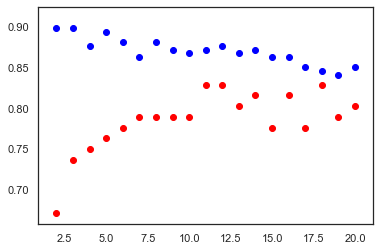

In [30]:
# For overlapping scatter plots 
plt.scatter(K, training, color ='blue') 
plt.scatter(K, test, color ='red') 
plt.show() 

**From the above scatter plot, we can come to the conclusion that the optimum value of k will be 7. But, this model doesn't perform well. Let's check model performance with K=7**

In [31]:
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors = 7) 
clf_knn= knn.fit(X_train, y_train)

# predicting test set results 
y_pred = knn.predict(X_test)

Text(89.18, 0.5, 'Predicted Class')

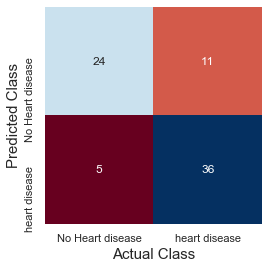

In [32]:
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['No Heart disease', 'heart disease'],
yticklabels=['No Heart disease', 'heart disease'])
plt.xlabel('Actual Class', fontsize= 15)
plt.ylabel('Predicted Class',fontsize= 15)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.79
Precision score: 0.77
Recall score: 0.88
F1 score: 0.79


**XGB**

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Fitting XGBoost to the training data 
import xgboost as xgb 
my_model = xgb.XGBClassifier() 
xgb_fit= my_model.fit(X_train, y_train) 
   
# Predicting the Test set results 
y_pred = my_model.predict(X_test) 

Text(89.18, 0.5, 'Predicted Class')

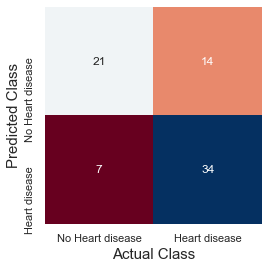

In [36]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['No Heart disease', 'Heart disease'],
yticklabels=['No Heart disease', 'Heart disease'])
plt.xlabel('Actual Class', fontsize= 15)
plt.ylabel('Predicted Class',fontsize= 15)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

#can create dataframe additionally based on model performance

Accuracy score: 0.72
Precision score: 0.71
Recall score: 0.83
F1 score: 0.72


**Model Comparison**

**Random Forest**

Accuracy score: 0.73

Precision score: 0.76

Recall score: 0.52

F1 score: 0.73

**Naive Bayes**

Accuracy score: 0.68

Precision score: 0.71

Recall score: 0.39

F1 score: 0.68

**Logistic Regression**

Accuracy score: 0.77

Precision score: 0.85

Recall score: 0.55

F1 score: 0.77

**KNN**

Accuracy score: 0.69

Precision score: 0.75

Recall score: 0.39

F1 score: 0.69

**XGB**

Accuracy score: 0.72

Precision score: 0.71

Recall score: 0.55

F1 score: 0.72

**Receiver Operating Characteristic (ROC)**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [39]:
#  Get predicted probabilities for each classifiers from fitted classifiers
y_score1 = rf_fit.predict_proba(X_test)[:,1]
y_score2 = cv_ber.predict_proba(X_test)[:,1]
y_score3 = cv_logreg.predict_proba(X_test)[:,1]
y_score4 = clf_knn.predict_proba(X_test)[:,1]
y_score5 = xgb_fit.predict_proba(X_test)[:,1]

# Plot Receiving Operating Characteristic Curve
  # Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)

print('roc_auc_score for Random Forest: {0:0.2f}'.format (roc_auc_score(y_test, y_score1)))
print('roc_auc_score for Naive Bayes: {0:0.2f}'.format (roc_auc_score(y_test, y_score2)))
print('roc_auc_score for Logistic Regression: {0:0.2f}'.format (roc_auc_score(y_test, y_score3)))
print('roc_auc_score for KNN: {0:0.2f}'.format (roc_auc_score(y_test, y_score4)))
print('roc_auc_score for XGBoost: {0:0.2f}'.format (roc_auc_score(y_test, y_score5)))

roc_auc_score for Random Forest: 0.87
roc_auc_score for Naive Bayes: 0.87
roc_auc_score for Logistic Regression: 0.85
roc_auc_score for KNN: 0.86
roc_auc_score for XGBoost: 0.85


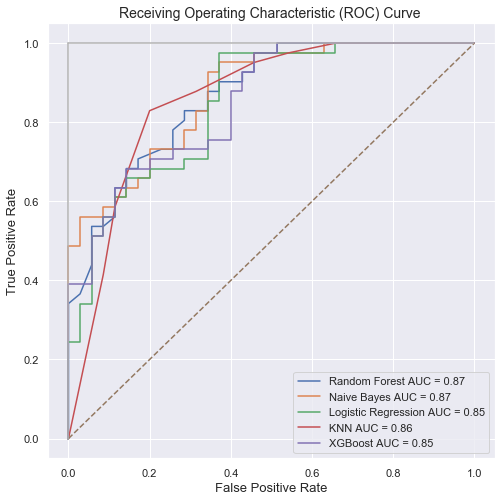

In [40]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="Random Forest AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score1)))
plt.plot(false_positive_rate2, true_positive_rate2, label="Naive Bayes AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score2)))
plt.plot(false_positive_rate3, true_positive_rate3, label="Logistic Regression AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score3)))
plt.plot(false_positive_rate4, true_positive_rate4, label="KNN AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score4)))
plt.plot(false_positive_rate5, true_positive_rate5, label="XGBoost AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score5)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic (ROC) Curve ', fontsize= 14)
plt.legend()
plt.show()

**By looking at the ROC curve and AUC scores, we can say that Random Forest is the best performing model.**


**Running Random Forest only with important parameters**

In [41]:
features= heart_failure.drop('target',axis=1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [42]:
# Get numerical feature importances
importances = list(rf_fit.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cp                   Importance: 0.15
Variable: oldpeak              Importance: 0.13
Variable: thal                 Importance: 0.13
Variable: thalach              Importance: 0.1
Variable: age                  Importance: 0.08
Variable: chol                 Importance: 0.08
Variable: trestbps             Importance: 0.07
Variable: slope                Importance: 0.07
Variable: ca                   Importance: 0.07
Variable: exang                Importance: 0.06
Variable: sex                  Importance: 0.03
Variable: restecg              Importance: 0.02
Variable: fbs                  Importance: 0.01


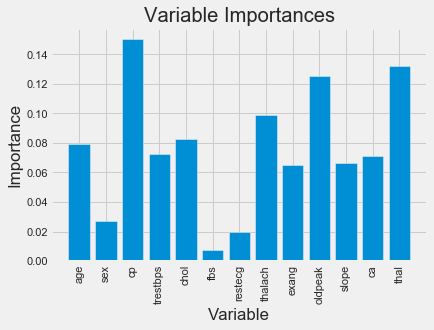

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

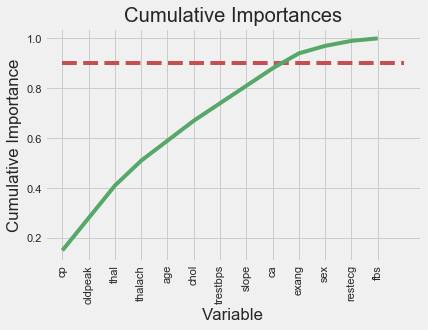

In [44]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [45]:
# Find number of features for cumulative importance of 90%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 10



Let's run Random Forest only with important features

In [46]:
important_indices = [feature_list.index('cp'),
                     feature_list.index('oldpeak'), 
                     feature_list.index('thal'), 
                    feature_list.index('thalach'),
                     feature_list.index('age'),
                     feature_list.index('chol'),
                     feature_list.index('trestbps'),
                     feature_list.index('slope'),
                     feature_list.index('ca'),
                     feature_list.index('exang')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [47]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [48]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [49]:
predictions = rf_most_important.predict(test_important)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.72
Precision score: 0.71
Recall score: 0.83
F1 score: 0.72


We have reached 90% cumulative importance with 10 features.

We cannot say that the models above yielded best result, since we used default paramaters. However, next, we optimizing the hyperparameters to see if the model give the accurate result. We will use ***Random search and Grid search***.
In Random Search, we create a grid of hyperparameters and train/test our model(Random Forest) on just some random combination of these hyperparameters. We additionally decided to perform Cross-Validation on the training set.

In [51]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  3.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [53]:
from sklearn.metrics import classification_report
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)
acc3

[[22 13]
 [ 2 39]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        35
           1       0.75      0.95      0.84        41

    accuracy                           0.80        76
   macro avg       0.83      0.79      0.79        76
weighted avg       0.83      0.80      0.80        76



0.8026315789473685

In Grid Search, we set up a grid of hyperparameters and train/test our model on each of the possible combinations.<br>
In order to choose the parameters to use in Grid Search, we can now look at which parameters worked best with Random Search and form a grid based on them to see if we can find a better combination.<br>

In [54]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, 
                     model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, 
                     model.best_params_['n_estimators'] + 150]
}

In [56]:
rf_gridSearch = RandomForestClassifier()
model1 = GridSearchCV(estimator = rf_gridSearch, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model1.fit(X_train,y_train)

predictionforest1 = model1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest1))
print(classification_report(y_test,predictionforest1))
acc4 = accuracy_score(y_test,predictionforest1)
acc4

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   38.0s finished


[[23 12]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.76      0.90      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.80      0.79      0.79        76



0.7894736842105263

Grid Search is slower compared to Random Search but it can be overall more effective because it can go through the whole search space. Instead, Random Search can be faster fast but might miss some important points in the search space.